<a href="https://colab.research.google.com/github/dave165189/Summer-school-assignment/blob/main/DEVESHassignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/RICE.csv.zip")

In [4]:
df.head()

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack


In [5]:
df.describe()

,Observation Year,Standard Week,Pest Value,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm)
count,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000
mean,2000.024789,26.473717,807.944081,31.169006,20.404540,82.190981,53.725763,19.414152,4.501268,6.858529,5.877180
std,9.827306,15.016247,5290.180315,4.904610,5.388381,13.846883,18.948801,39.160009,3.194973,4.176542,6.536221
min,1959.000000,1.000000,0.000000,10.900000,0.800000,9.300000,6.700000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,13.000000,0.000000,28.800000,17.500000,79.100000,38.000000,0.000000,2.300000,4.900000,2.900000
50%,2001.000000,26.000000,3.000000,30.900000,22.000000,87.300000,56.600000,0.000000,3.700000,7.300000,4.000000
75%,2007.000000,39.000000,92.000000,33.425000,24.400000,91.000000,69.000000,21.400000,5.900000,8.900000,6.000000
max,2011.000000,52.000000,311169.000000,71.600000,30.900000,100.000000,95.100000,444.400000,27.600000,127.100000,68.300000


In [6]:
df.isna().sum()

Observation Year    0
Standard Week       0
Pest Value          0
Collection Type     0
MaxT                0
MinT                0
RH1(%)              0
RH2(%)              0
RF(mm)              0
WS(kmph)            0
SSH(hrs)            0
EVP(mm)             0
PEST NAME           0
Location            0
dtype: int64

In [7]:
numericals = ['MaxT', 'MinT', 'RH1(%)', 'RH2(%)', 'RF(mm)', 'WS(kmph)', 'SSH(hrs)', 'EVP(mm)']

###**General data distribution of numerical features** ****

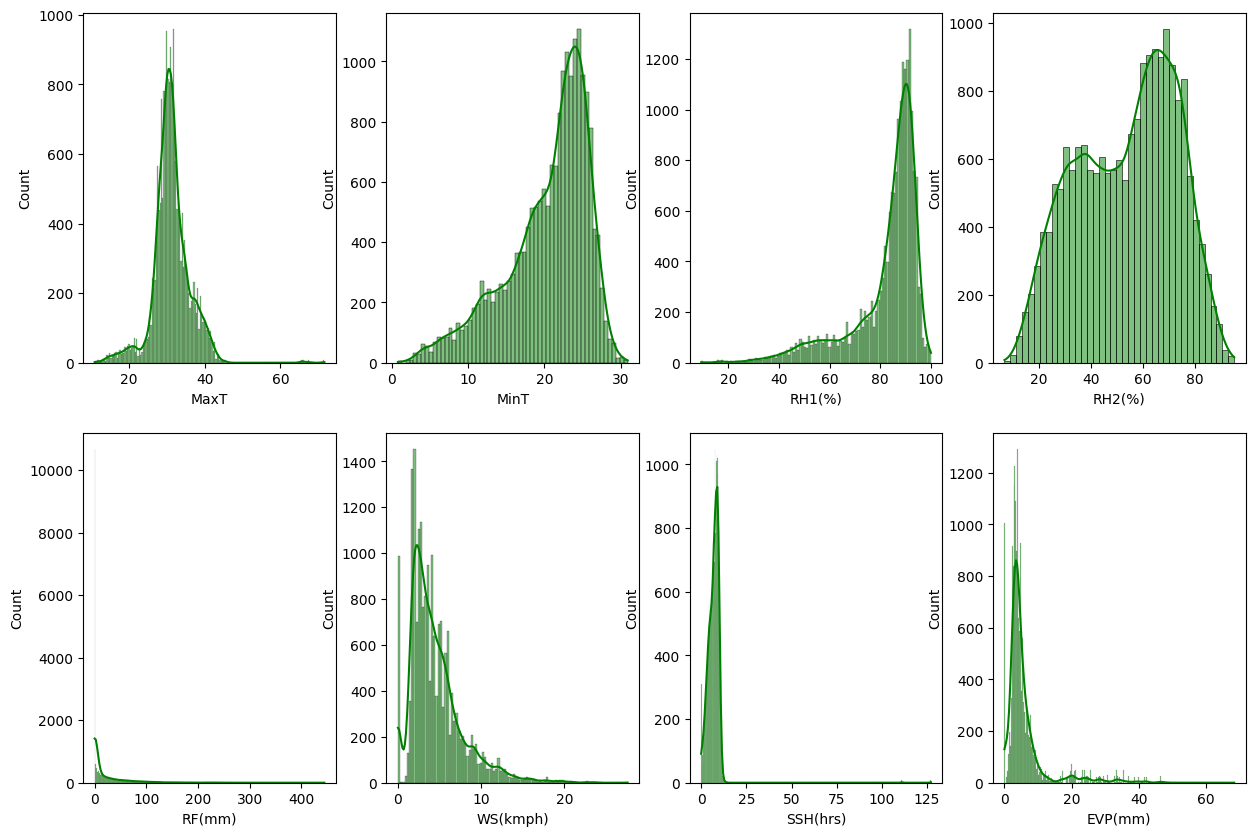

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
k = 0
for i in range(2):
    for j in range(4):
        sns.histplot(df, x=df[numericals[k]], kde=True, color='g', ax=axes[i][j])
        k += 1

<Axes: >

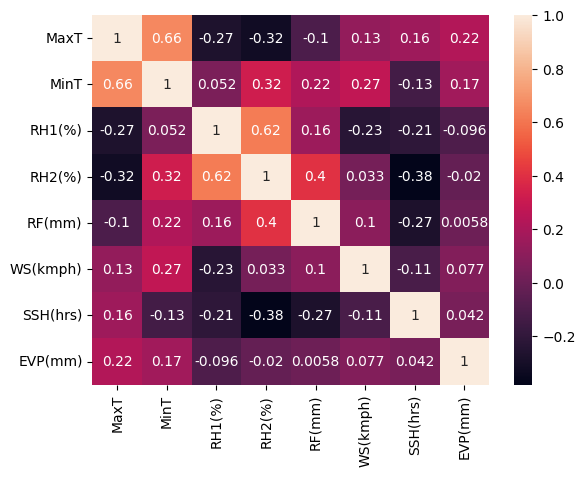

In [9]:
to_corr = df[numericals]
corr = to_corr.corr()
sns.heatmap(corr, annot=True)

In [10]:
def plots(df, x):
    grouped = df.groupby('PEST NAME')
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
    sns.histplot(df, x=x, hue='PEST NAME', ax=axes[0])
    sns.barplot(x=grouped[x].mean().index,
               y=grouped[x].mean(),
               ax=axes[1])
    
    for container in axes[1].containers:
        axes[1].bar_label(container, size=15, color='black')
        
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    
    sns.boxplot(x=df['PEST NAME'], y=df[x], ax=axes[2])
    axes[2].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
    
    plt.suptitle("{} data distributions grouped by pest types".format(x.capitalize()), size=15)
        
    plt.tight_layout()
    plt.show()

###**Categorical data pie charts**

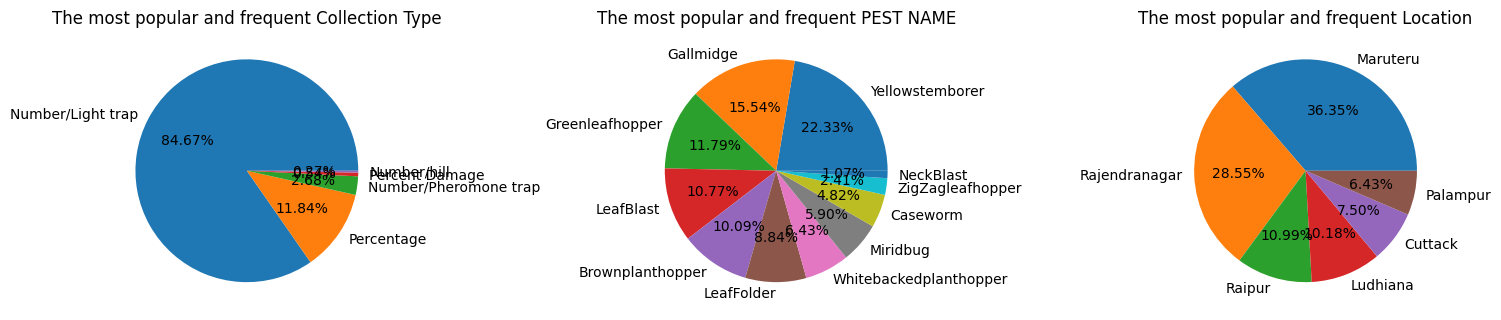

In [11]:
cats = ['Collection Type', 'PEST NAME', 'Location']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 11))
for i in range(3):
    axes[i].pie(df[cats[i]].value_counts(),
               labels=df[cats[i]].value_counts().index,
               autopct='%0.2f%%')
    
    axes[i].set_title("The most popular and frequent {}".format(cats[i]))
plt.tight_layout()
plt.show()

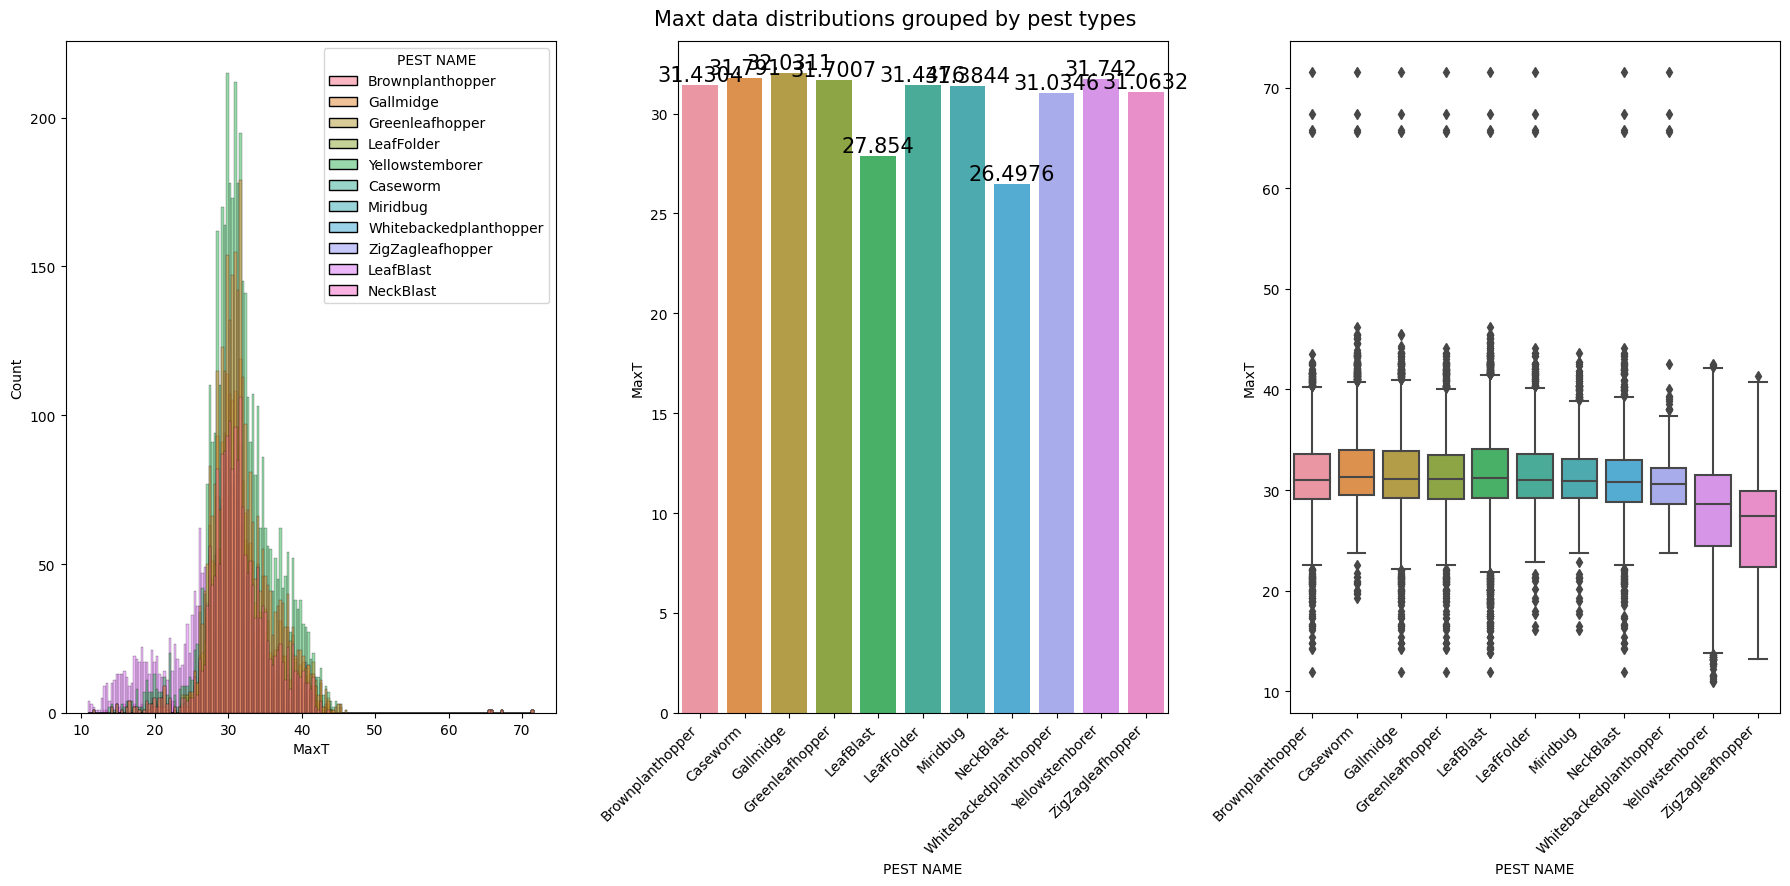

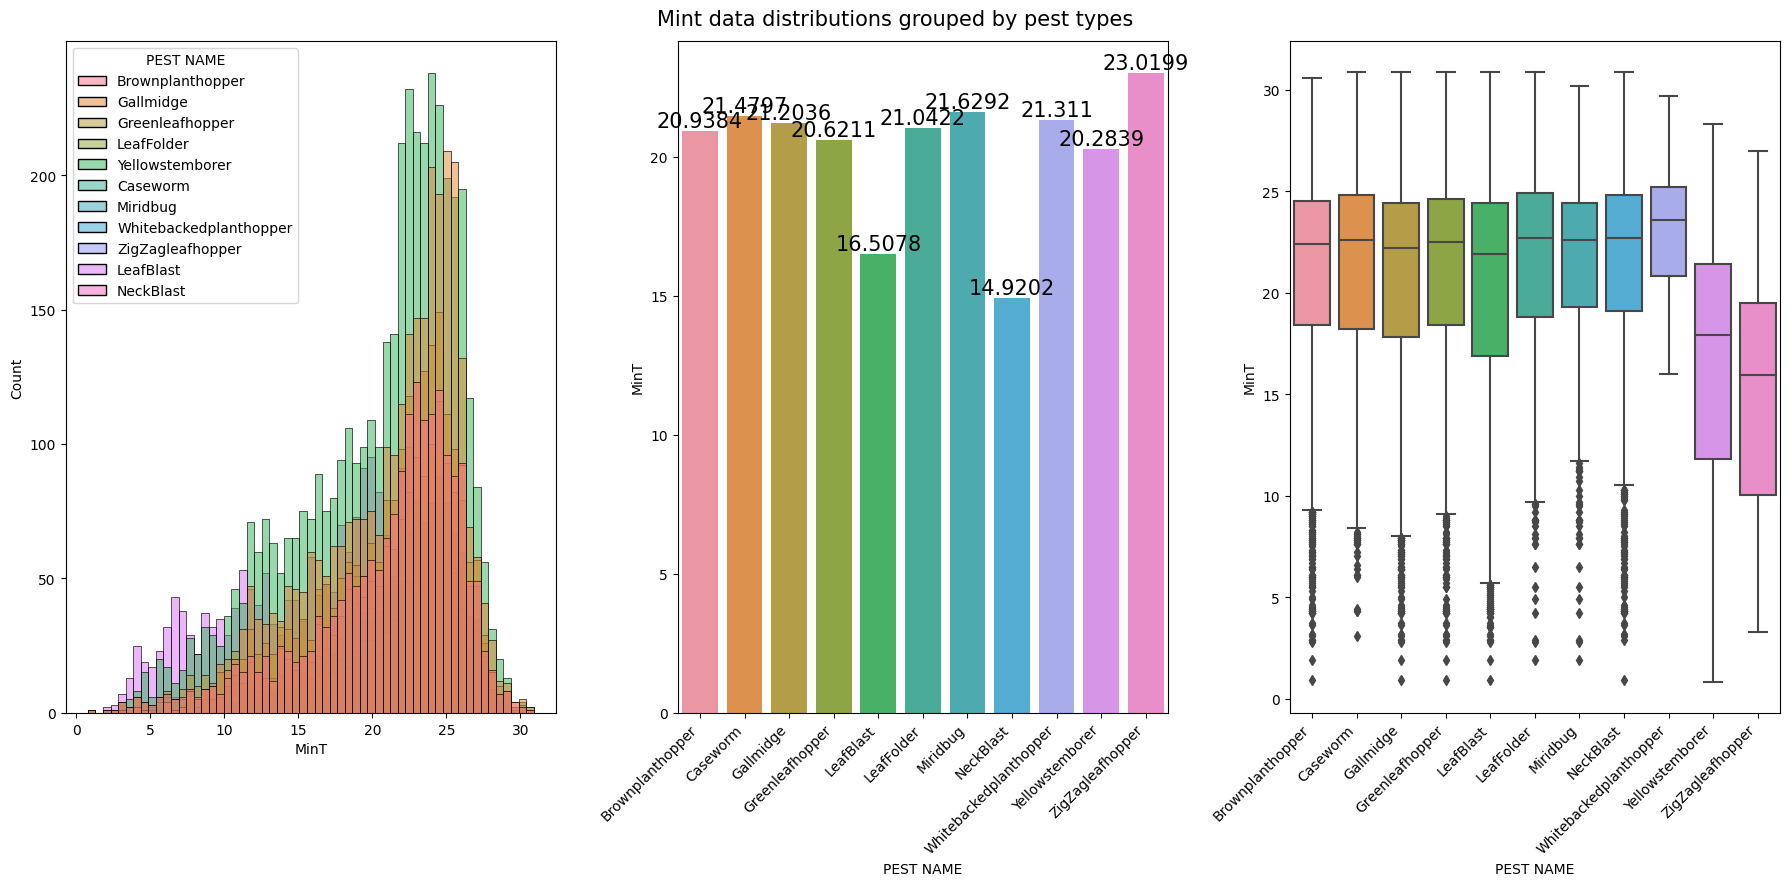

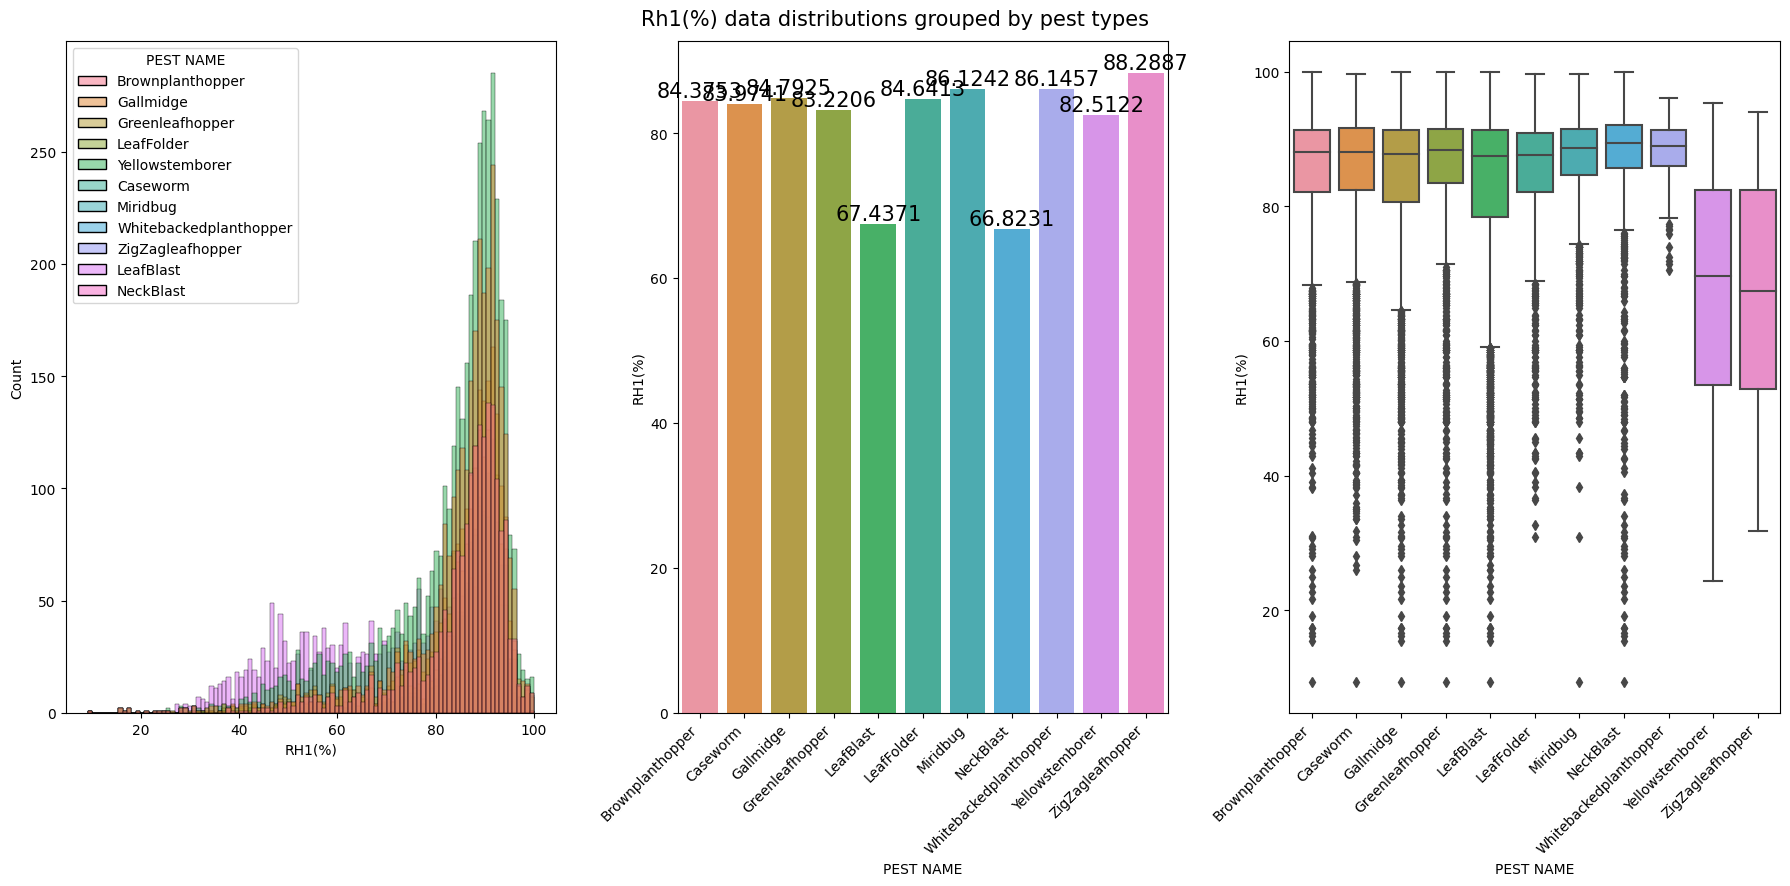

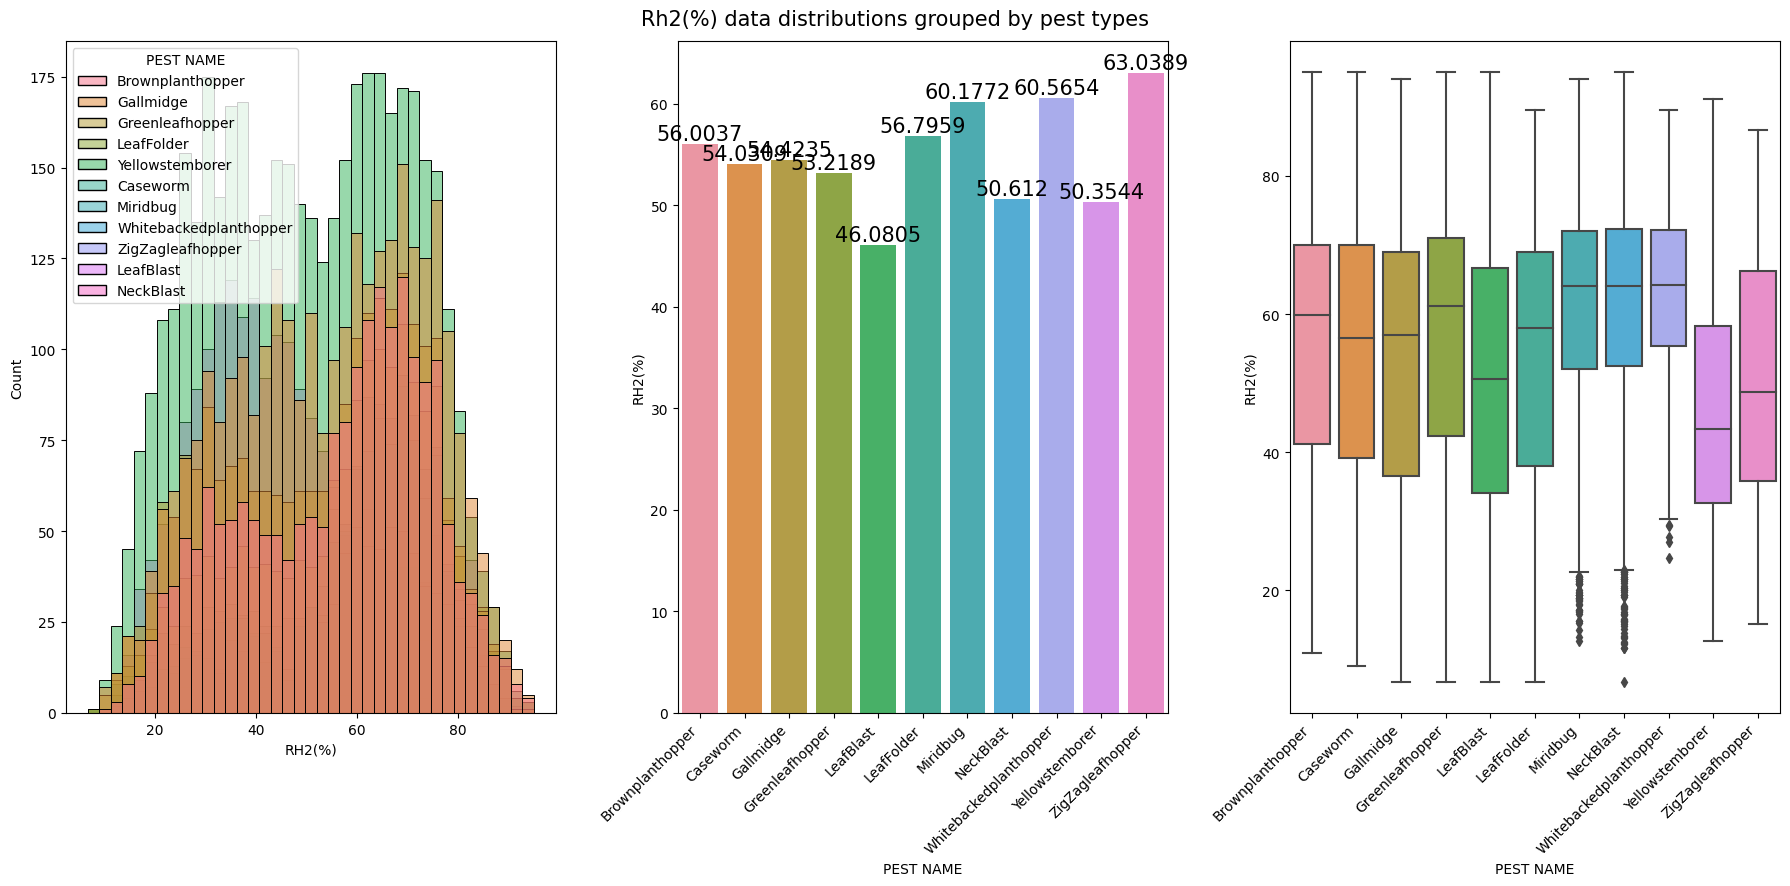

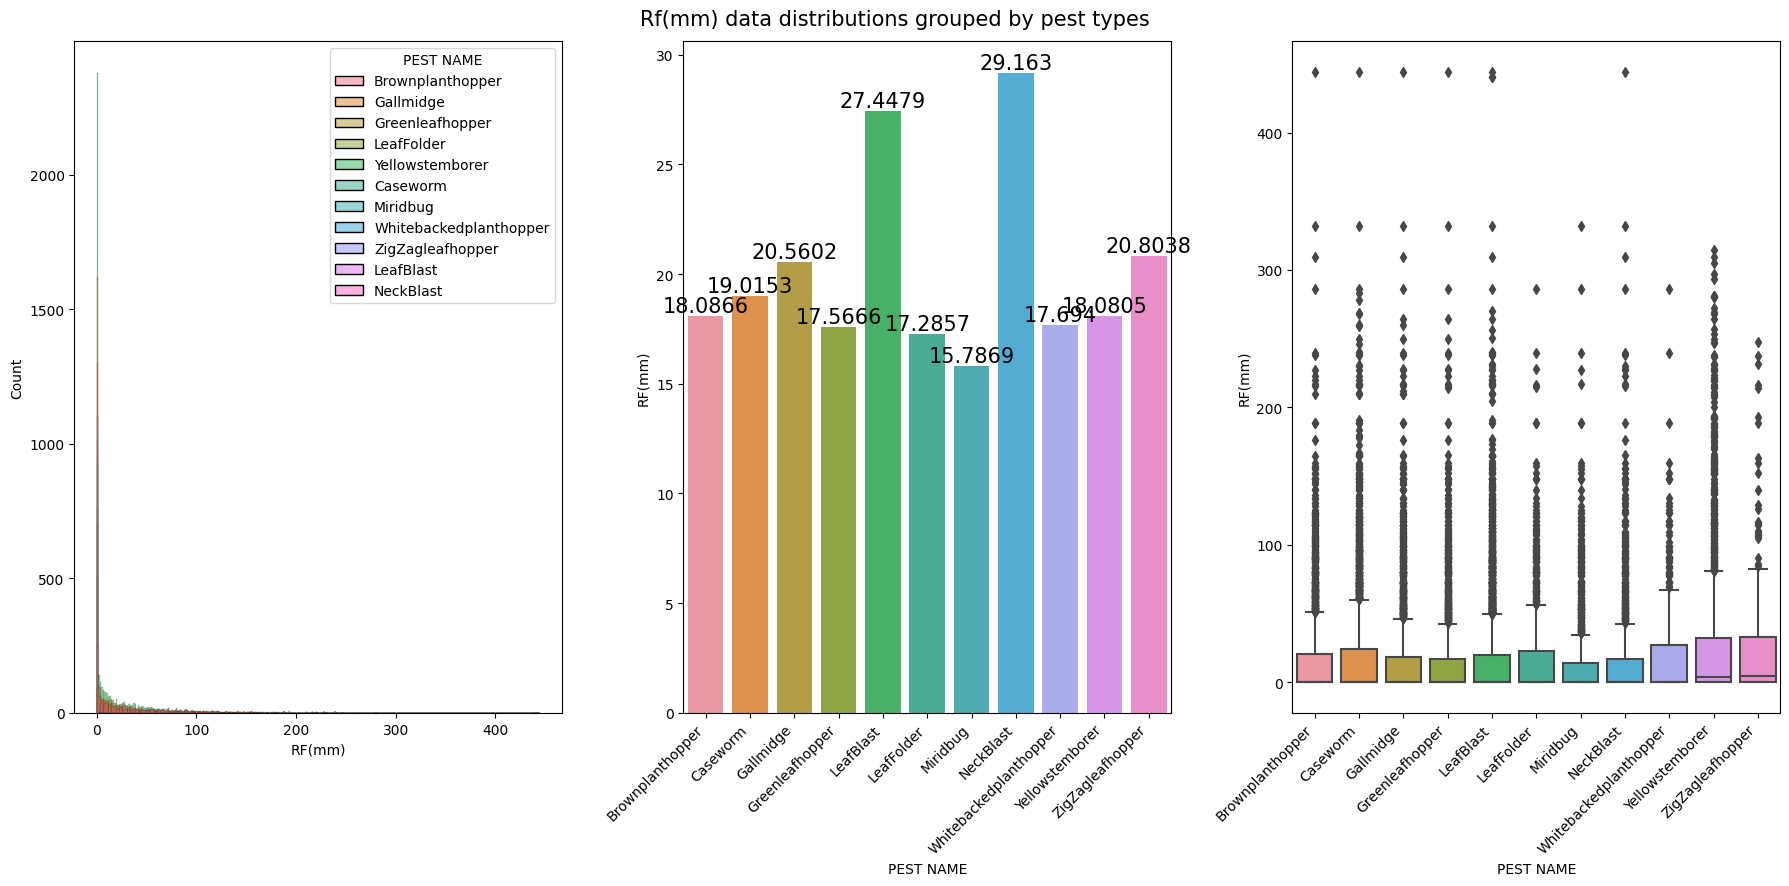

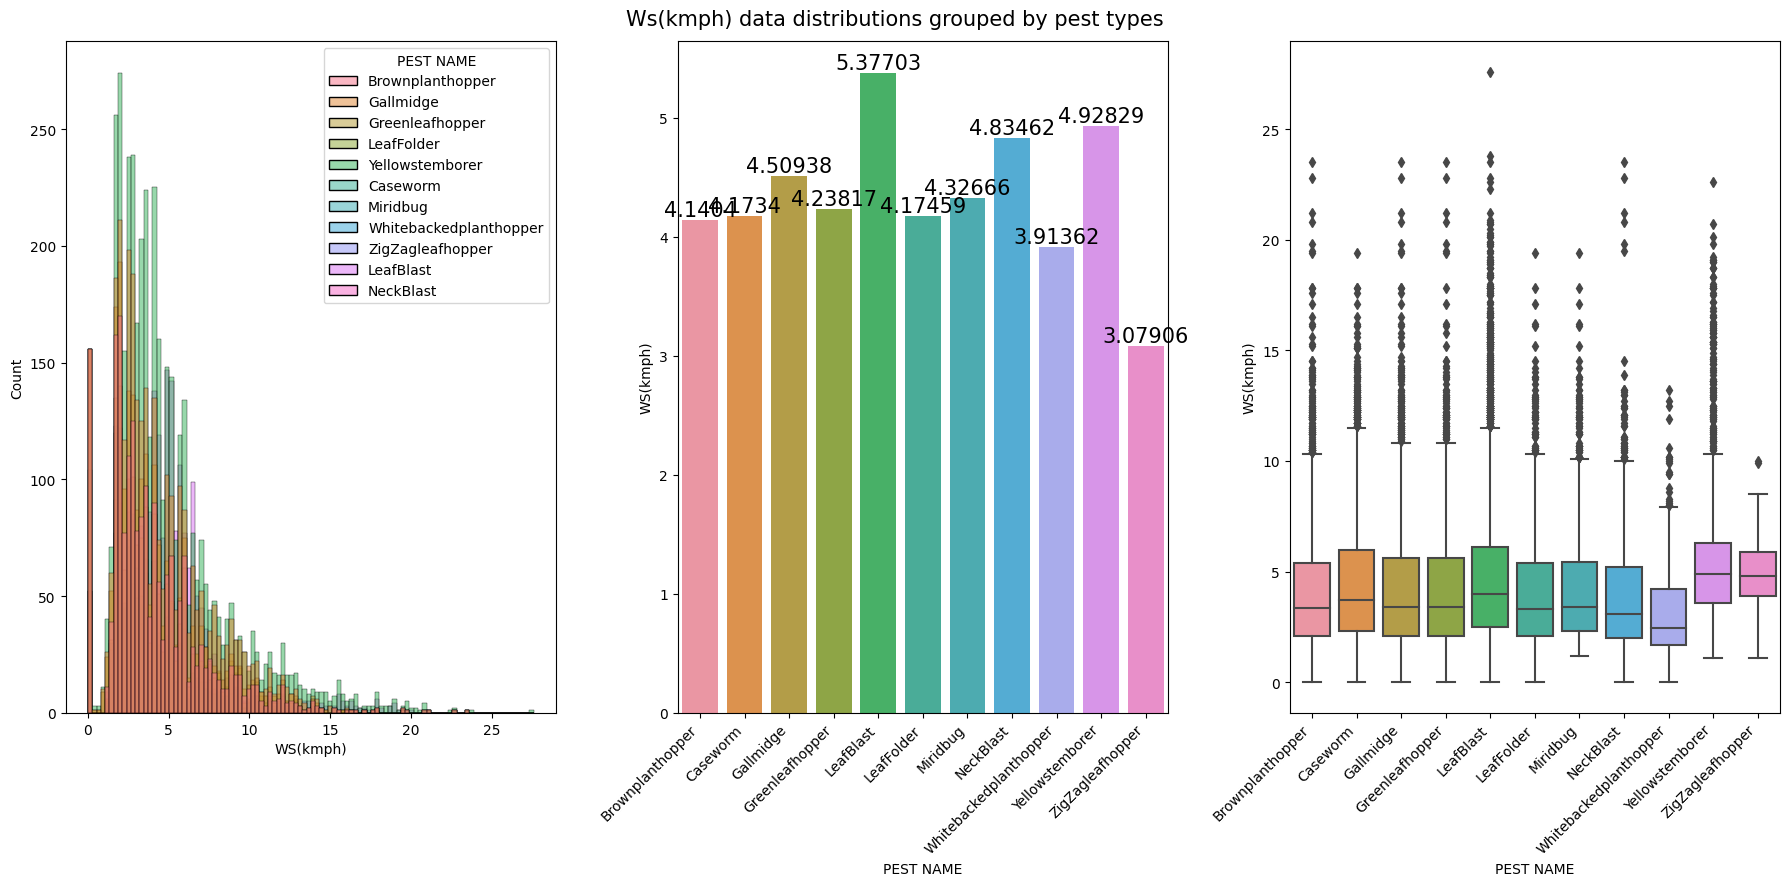

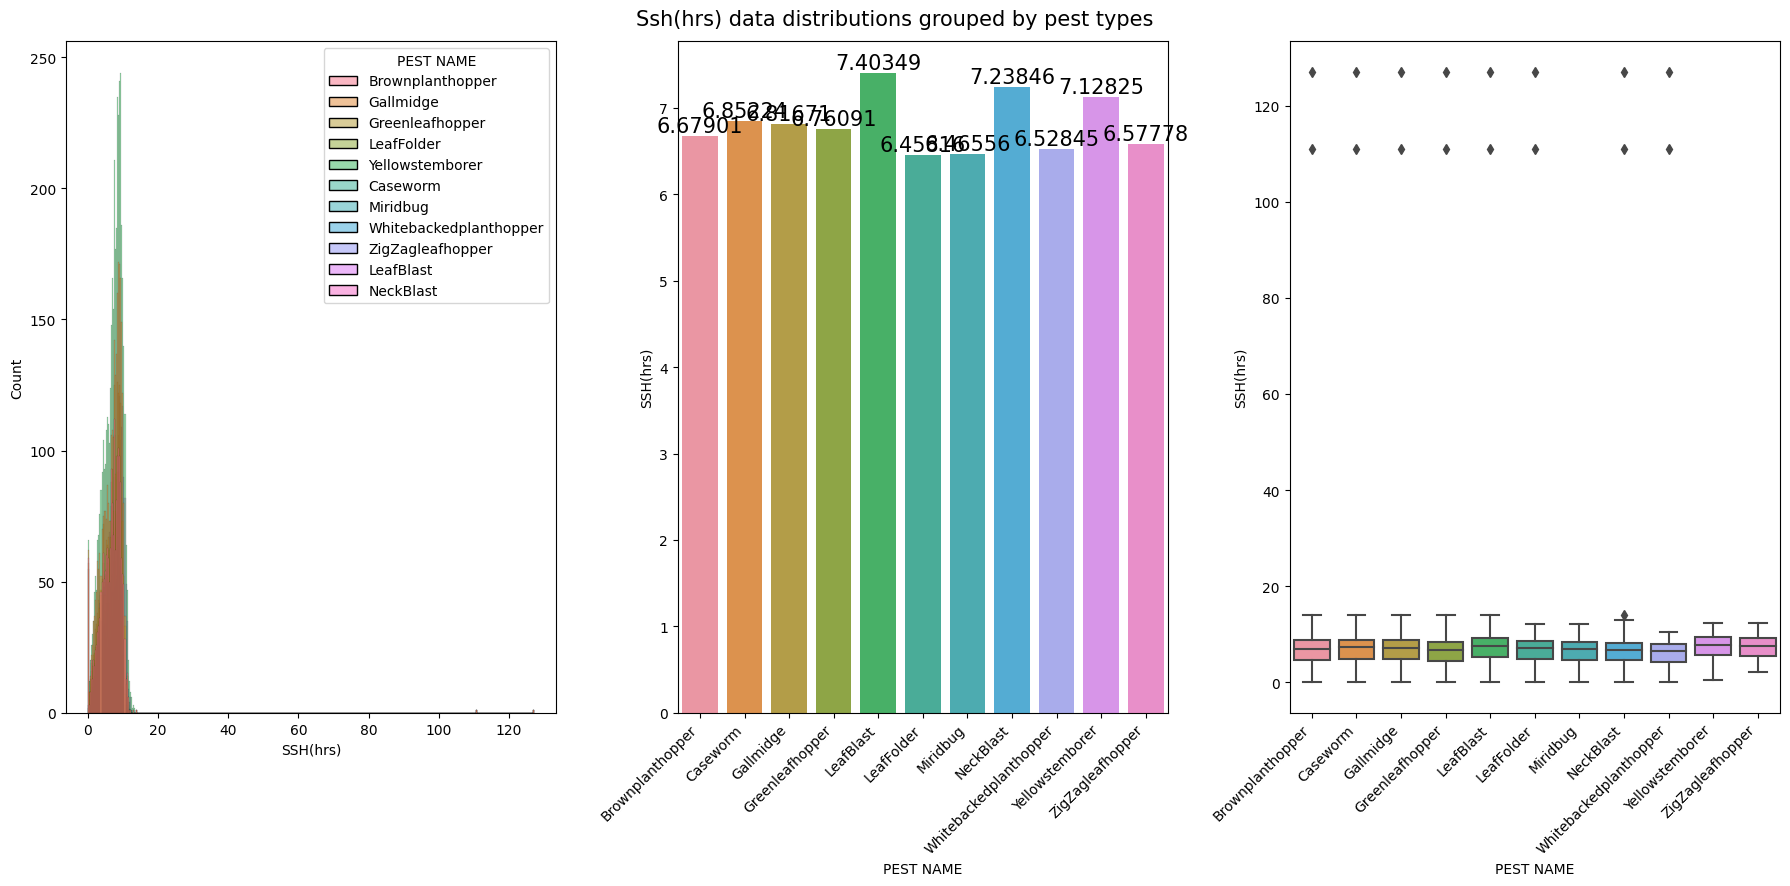

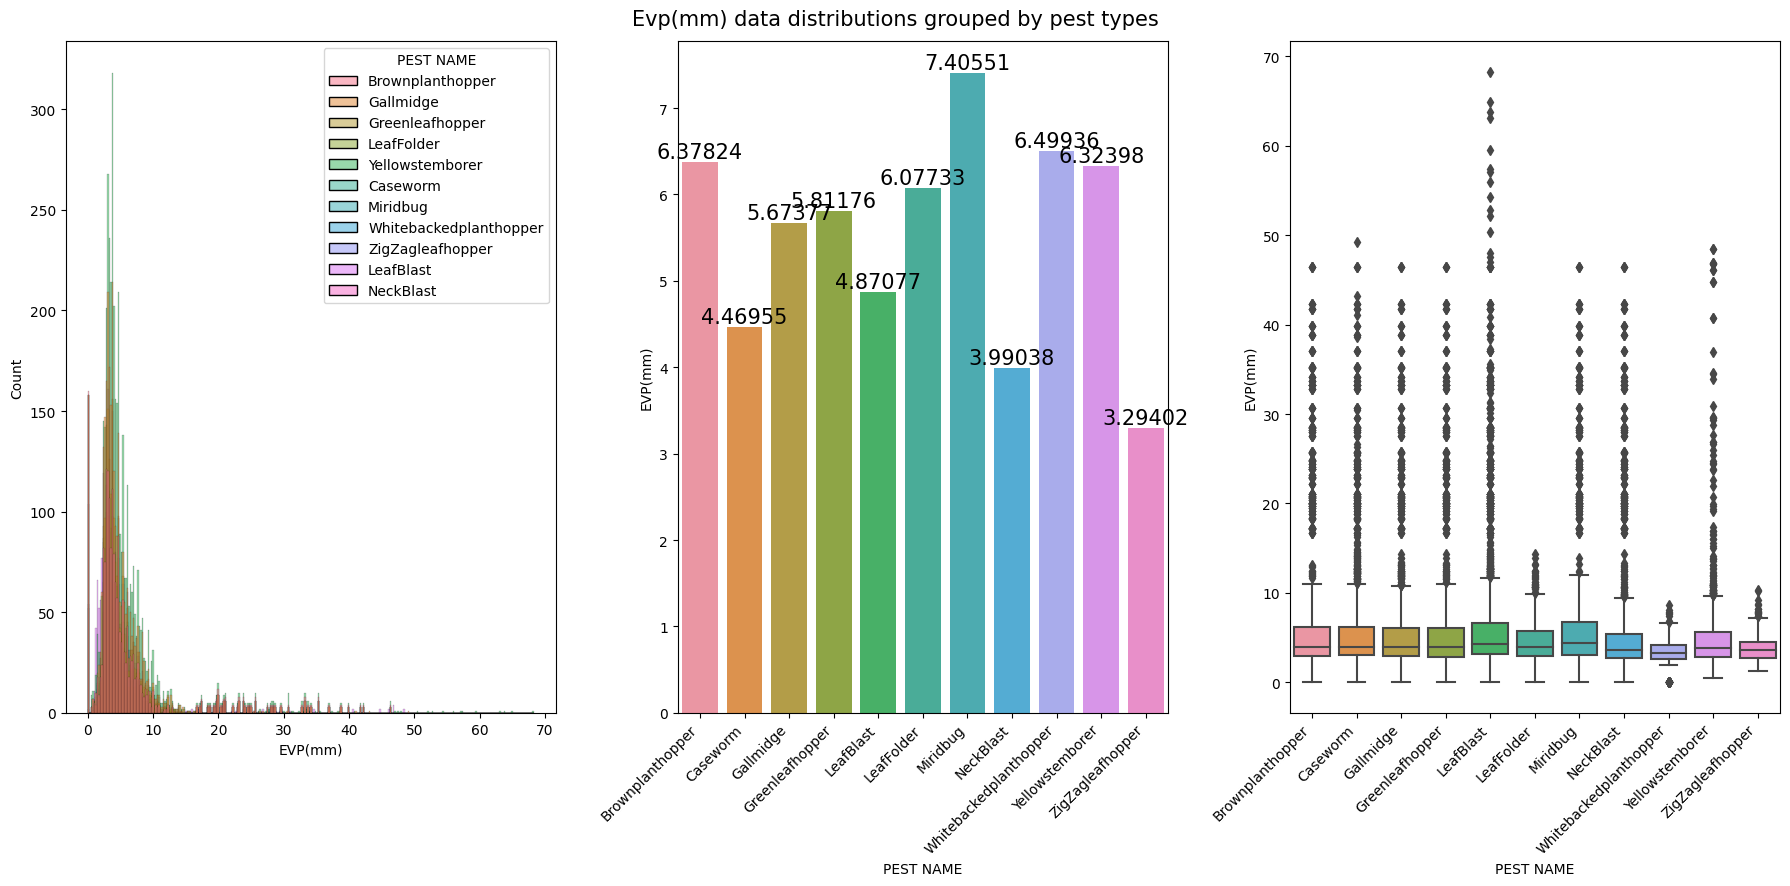

In [12]:
for i in numericals:
    plots(df, i)

### **Most common pests by region**

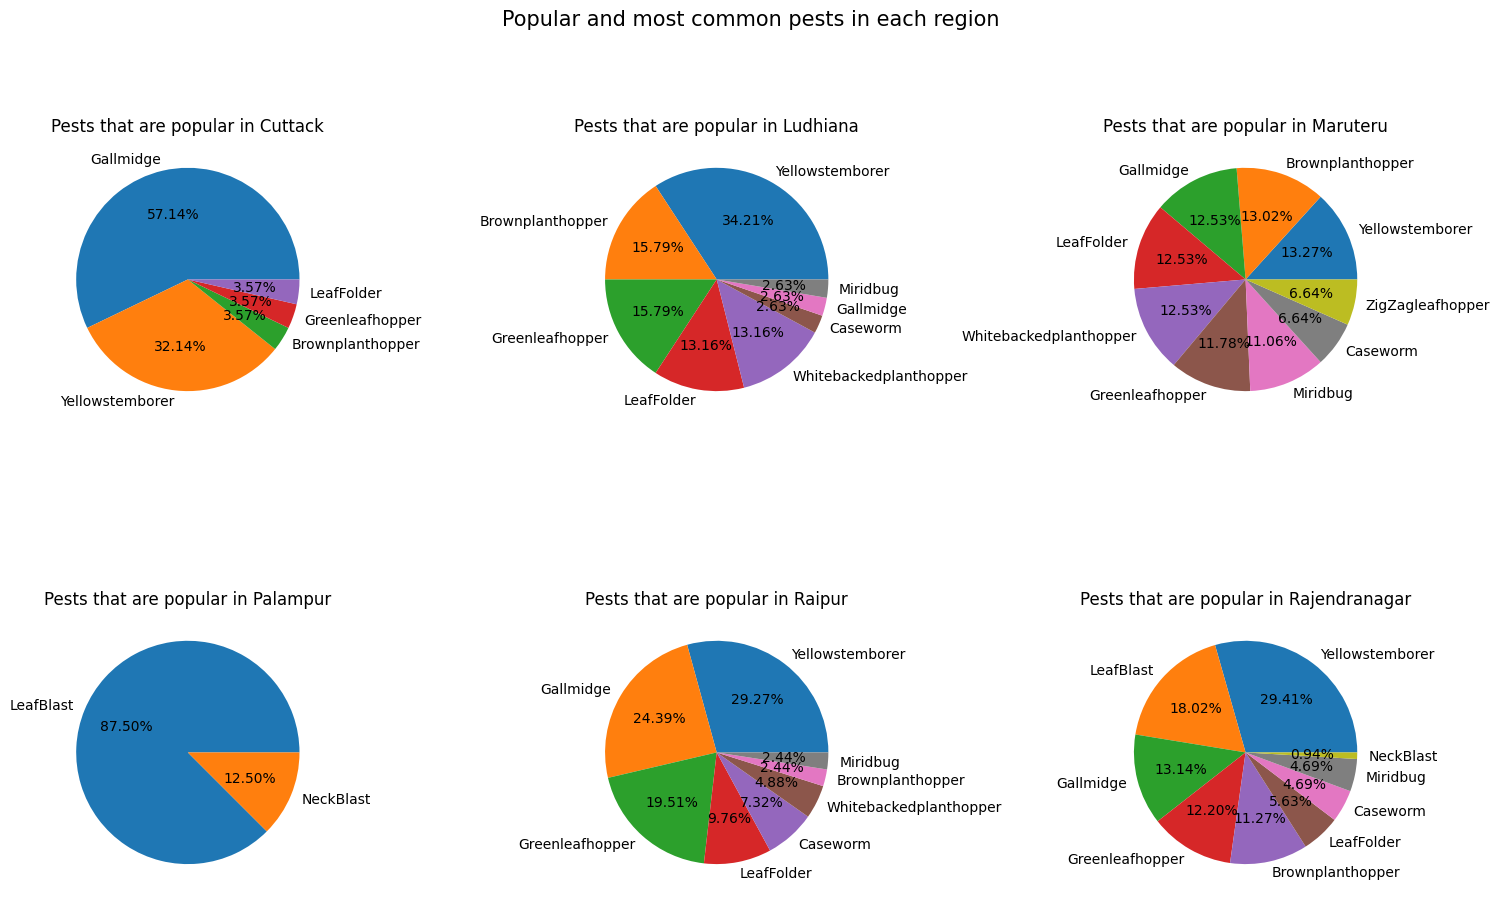

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
locations = df['Location'].unique()
k = 0
for i in range(2):
    for j in range(3):
        grouped = df[df['Location'] == locations[k]]
        axes[i][j].pie(grouped['PEST NAME'].value_counts(),
                      labels=grouped['PEST NAME'].value_counts().index,
                      autopct='%0.2f%%')
        
        axes[i][j].set_title("Pests that are popular in {}".format(locations[k]))
        
        k += 1
        
plt.suptitle("Popular and most common pests in each region", size=15)
        
plt.tight_layout()
        
plt.show()